In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

### Step 1. Load and Explore the Dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('sentiment140.csv', encoding='latin-1', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [2]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text'] #check kaggle

In [3]:
df = df[['text', 'target']]
df

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [4]:
df['target'].unique()

array([0, 4])

In [5]:
# Map targets to sentiment labels
df['target'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})
df   

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...
1599995,Just woke up. Having no school is the best fee...,positive
1599996,TheWDB.com - Very cool to hear old Walt interv...,positive
1599997,Are you ready for your MoJo Makeover? Ask me f...,positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,positive


In [6]:
df['target'].unique()

array(['negative', 'positive'], dtype=object)

### Step 2: Data Cleaning and Preprocessing
#### using NLTK and re

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt') #Punkt is a pre-trained tokenizer model for splitting text into sentences or words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meetkamalkaursahni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/meetkamalkaursahni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download()

In [8]:
# Loads a predefined list of English stopwords and wraps them in a set to make lookups faster
stop_words = set(stopwords.words('english'))

In [ ]:
text = """Cigna denied my claim.
They said it's not covered.
Visit http://cigna.com for more."""

In [ ]:
cleaned = re.sub(r'^Visit.*', '', text, )
print(cleaned)

In [9]:
def clean_text(text):
    #matches anything starting with http, https and www followed by non-whitespace characters and replaces it with ''
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    #removes mentions (e.g.@Cigna) and hashtags (e.g. #healthcare))
    text = re.sub(r'\@\w+|\#','', text)
    #removes special characters, numbers, emojis etc and keeps only letters and spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)
    #converts text to lowercase to ensure consistency
    text = text.lower()
    #breaks the text into tokens
    tokens = word_tokenize(text)
    #only includes the tokens other then stopwords
    filtered = [w for w in tokens if not w in stop_words]
    return ' '.join(filtered)

In [10]:
df['clean_text'] = df['text'].apply(clean_text)
df['clean_text'].head()

0        thats bummer shoulda got david carr third day
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                             behaving im mad cant see
Name: clean_text, dtype: object

### Step 3: Feature Extraction/Vectorization: converting text into numbers

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize clean text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

In [12]:
y = df['target']

### Step 4: Model Training and Prediction

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [14]:
#split the data into test and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [32]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

In [15]:
# Predict
y_pred = model.predict(X_test)
print(y_pred)

['positive' 'positive' 'positive' ... 'positive' 'negative' 'negative']


### Step 5: Model Evaluation and Visualization

In [16]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.757840625
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.77      0.76    159494
    positive       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



#### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[122209  37285]
 [ 40206 120300]]


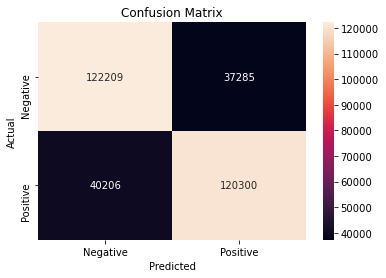

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("y_test labels:", set(y_test))

In [ ]:
print("y_pred labels:", set(y_pred))

In [ ]:
vectorizer.get_feature_names()

In [ ]:
import sklearn
print(sklearn.__version__)

In [24]:
lst = [1,2,3,4,5]
print(lst.index(3))

2


In [31]:
import joblib
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(model, "model.pkl")

['model.pkl']